In [1]:
import pandas as pd
#load data
file_path = 'C:/Users/otrin/OneDrive/Desktop/Git/cryptocurrencies/shopping_data.csv'
df_shopping = pd.read_csv(file_path, encoding="ISO-8859-1")
df_shopping.head(5)

,CustomerID,Card Member,Age,Annual Income,Spending Score (1-100)
0,1,Yes,19.0,15000,39.0
1,2,Yes,21.0,15000,81.0
2,3,No,20.0,16000,6.0
3,4,No,23.0,16000,77.0
4,5,No,31.0,17000,40.0


## Questions for Data Preparation

Unsupervised learning doesn’t have a clear outcome or target variable like supervised learning, but it is used to find patterns. By properly preparing the data, we can select features that help us find patterns or groups.

Before we begin, consider these questions:

- What knowledge do we hope to glean from running an unsupervised learning model on this dataset?
- What data is available? What type? What is missing? What can be removed?
- Is the data in a format that can be passed into an unsupervised learning model?
- Can I quickly hand off this data for others to use?
- Let’s address the first question on our list:

What knowledge do we hope to glean from running an unsupervised learning model on this dataset?

It’s a shopping dataset, so we can group together shoppers based on spending habits.

## What data is available?

First, account for the data you have. After all, you can’t extract knowledge without data. We can use the columns method and output the columns, as shown below:

In [2]:
# Columns
df_shopping.columns

Index(['CustomerID', 'Card Member', 'Age', 'Annual Income',
       'Spending Score (1-100)'],
      dtype='object')

Now that we know what data we have, we can start thinking about possible analysis. For example, data points for features like Age and Annual Income might appear in our end result as groupings or clusters. However, there are no data points for items purchased, so our algorithms cannot discover related patterns.

## What type of data is available?
Using the dtypes method, confirm the data type, which also will alert us if anything should be changed in the next step (e.g., converting text to numerical data). All the columns we plan to use in our model must contain a numerical data type:

In [3]:
# List dataframe data types
df_shopping.dtypes

CustomerID                  int64
Card Member                object
Age                       float64
Annual Income               int64
Spending Score (1-100)    float64
dtype: object

## What data is missing?
Next, let’s see if any data is missing. Unsupervised learning models can’t handle missing data. If you try to run a model on a dataset with missing data, you’ll get an error such as the one below:

ValueError: Input contains NaN, infinity or a value too large for dtype('float64').

If you initially had hoped to produce an outcome using a type of data, but it turned out more than 80% of those rows are empty, then the results won’t be very accurate!

For example, return to our Age and Income groups: If it turns out there are 1,200 rows without any Age data points, then we clearly can’t use that column in our model. There is no set cutoff for missing data—that decision is left up to you, the analyst, and must be made based on your understanding of the business needs.

__NOTE__
Handling missing data is a complex topic that is out of scope for this unit. However, if you’re interested, read this article (Links to an external site.) on the possible approaches to handling missing data.

Pandas has the isnull() method to check for missing values. We’ll loop through each column, check if there are null values, sum them up, and print out a readable total:

In [4]:
# Find null values
for column in df_shopping.columns:
    print(f"Column {column} has {df_shopping[column].isnull().sum()} null values")

Column CustomerID has 0 null values
Column Card Member has 2 null values
Column Age has 2 null values
Column Annual Income has 0 null values
Column Spending Score (1-100) has 1 null values


There will be a few rows with missing values that we’ll need to handle. The judgement call will be to either remove these rows or decide that the dataset is not suitable for our model. In this case, we’ll proceed with handling these values because they are a small percentage of the overall data.

__IMPORTANT__
When deciding to proceed, the percentage of data missing isn’t always the only determining factor. See the Note callout above for a resource on handling missing data.

## What data can be removed?
You have begun to explore the data and have taken a look at null values. Next, determine if the data can be removed. Consider: Are there string columns that we can’t use? Are there columns with excessive null data points? Was our decision to handle missing values to just remove them?

In our example, there are no string type columns, and we made the decision that only a few rows have null data points, but not enough to remove a whole column’s worth.

Rows of data with null values can be removed with the dropna() method, as shown below:

In [5]:
# Drop null rows
df_shopping = df_shopping.dropna()

In [7]:
# Duplicates can also be removed.

# find duplicates
print(f"Duplicate entries: {df_shopping.duplicated().sum()}")

Duplicate entries: 0


In [8]:
# Remove non-essential columns, in this case CustomerID
df_shopping.drop(columns=['CustomerID'], inplace=True)
df_shopping.head()

,Card Member,Age,Annual Income,Spending Score (1-100)
0,Yes,19.0,15000,39.0
1,Yes,21.0,15000,81.0
2,No,20.0,16000,6.0
3,No,23.0,16000,77.0
4,No,31.0,17000,40.0


The next step is to move on from what you (the user) want to get out of your data and on to what the unsupervised model needs out of the data.

Recall that in the data selection step, you, as the user, are exploring the data to see what kind of insights and analysis you might glean. You reviewed the columns available and the data types stored, and determined if there were missing values.

For data processing, the focus is on making sure the data is set up for the unsupervised learning model, which requires the following:

- Null values are handled.
- Only numerical data is used.
- Values are scaled. In other words, data has been manipulated to ensure that the variance between the numbers won’t skew results.

__REWIND__
Recall that when features have different scales, they can have a disproportionate impact on the model. The unscaled value could lead to messy graphs. Therefore, it is important to understand when to scale and normalize data. For example, if four columns of data are single digits, and the fifth column is in the millions, we would need to scale the fifth column to align the other four.
Let’s return again to our list of questions.

Is the data in a format that can be passed into an unsupervised learning model?

We saw before that all our data had the correct type for each column; however, we know that our model can’t have strings passed into it.

To make sure we can use our string data, we’ll transform our strings of Yes and No from the Card Member column to 1 and 0, respectively, by creating a function that will convert Yes to a 1 and anything else to 0.

The function will then be run on the whole column with the .apply method, as shown below:

In [9]:
#Transform String Column
def change_string(member):
    if member == 'Yes':
        return 1
    else:
        return 0
    
df_shopping['Card Member'] = df_shopping['Card Member'].apply(change_string)
df_shopping.head()

,Card Member,Age,Annual Income,Spending Score (1-100)
0,1,19.0,15000,39.0
1,1,21.0,15000,81.0
2,0,20.0,16000,6.0
3,0,23.0,16000,77.0
4,0,31.0,17000,40.0


Also, there is one more thing you may notice about the data. The scale for Annual Income is much larger than all the other values in the dataset. We can adjust this format by dividing by 1,000 to rescale those data points, as shown below:

In [10]:
# Transform annual income
df_shopping['Annual Income'] = df_shopping['Annual Income'] / 1000
df_shopping.head()

,Card Member,Age,Annual Income,Spending Score (1-100)
0,1,19.0,15.0,39.0
1,1,21.0,15.0,81.0
2,0,20.0,16.0,6.0
3,0,23.0,16.0,77.0
4,0,31.0,17.0,40.0


__SKILL DRILL__
Reformat the names of the columns so they contain no spaces or numbers.

In [11]:
# Rename column names to use snake format
df_shopping.rename(columns = {'Card Member':'Card_Member', 'Annual Income':'Annual_Income', 
                              'Spending Score (1-100)':'Spending_Score'}, inplace = True)
df_shopping.head()

,Card_Member,Age,Annual_Income,Spending_Score
0,1,19.0,15.0,39.0
1,1,21.0,15.0,81.0
2,0,20.0,16.0,6.0
3,0,23.0,16.0,77.0
4,0,31.0,17.0,40.0


Data transformation involves thinking about the future. More times than not, there will be new data coming into your data storage (a place where raw data is stored before being touched), with many people working on different types of data analysis. We want to make sure that whoever wants to use the data in the future can do so.

Let’s return once more to our list of questions.

__Can I quickly hand off this data for others to use?__

The data now needs to be transformed back into a more user-friendly format. It would be nice if everyone was as great with DataFrames as you two; unfortunately, that is not the case. You’ll want to convert the final product into a common data type like CSV or Excel files.

Now that our data has been cleaned and processed, it is ready to be converted to a readable format for future use:

In [14]:
# Saving cleaned data
file_path = "C:/Users/otrin/OneDrive/Desktop/Git/cryptocurrencies/shopping_data_cleaned.csv"
df_shopping.to_csv(file_path, index=False)

__SKILL DRILL__
Try to export the data to a different format.

Now you know the questions to ask about your data and understand the Pandas processes used to help answer those questions. Different datasets have different issues. With practice, you’ll get better at identifying these.

# 18.3.1 Clustering Data

Clustering is a type of unsupervised learning that groups data points together. This group of data points is called a cluster.

Imagine you are in a roomful of spheres (data points). You want to learn more about them, so you start to observe them.

Every sphere represents a flower, and three axes represent features of flowers. After observing the flowers, you discover patterns when you combine the three features:

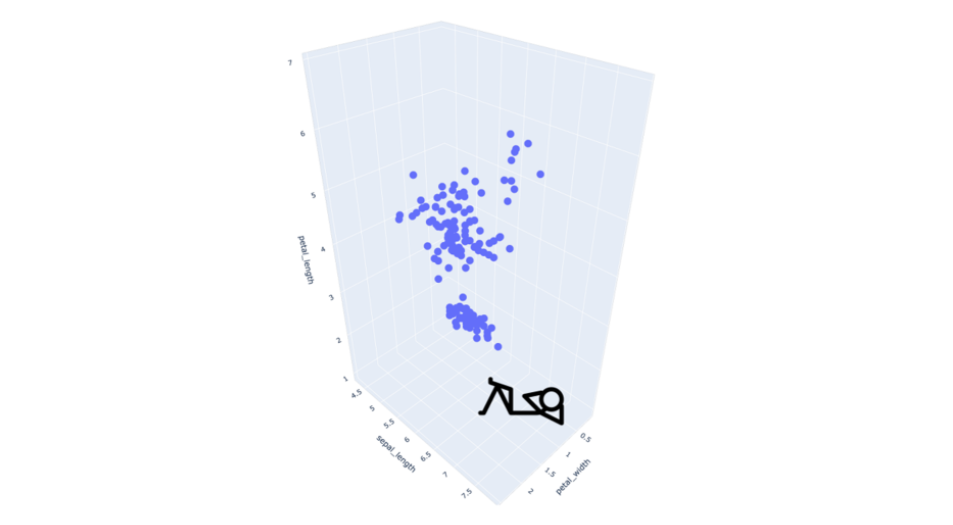

A 3D graph shows a stick figure person (you) observing the spheres (flowers) serving as data points along the three axes (flower features).

We can see that spheres (data points) with similar features seem to be closer together than data points with dissimilar features. We can use this spatial information to group similar data points together.

If you look at the flower features in the graph below, and start to plot them, they’ll start to form groups on the graph.

After we plot the data points, they start to form three different groups, or clusters:

The spheres are grouped together to form three different groups, or clusters.

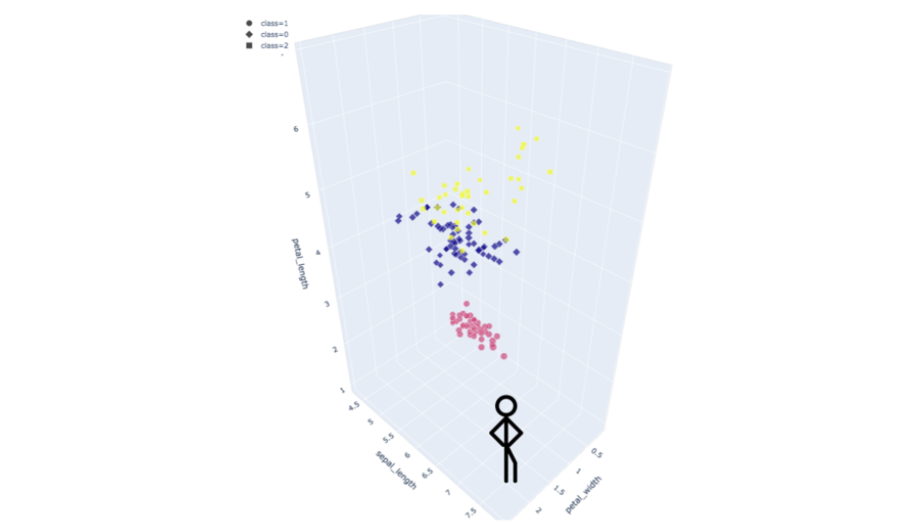

# 18.3.2 K-means Algorithm

Clustering is exactly what we want from unsupervised learning, but exactly how can we determine the clusters? Martha knows she needs to group the cryptocurrency data, but she isn’t sure how to determine the number of groups to create. One of the most popular ways to cluster is by using the K-means algorithm.

K-means is an unsupervised learning algorithm used to identify and solve clustering issues.

K represents how many clusters there will be. These clusters are then determined by the means of all the points that will belong to the cluster.

The K-means algorithm groups the data into K clusters, where belonging to a cluster is based on some similarity or distance measure to a centroid.

A centroid is a data point that is the arithmetic mean position of all the points on a cluster:

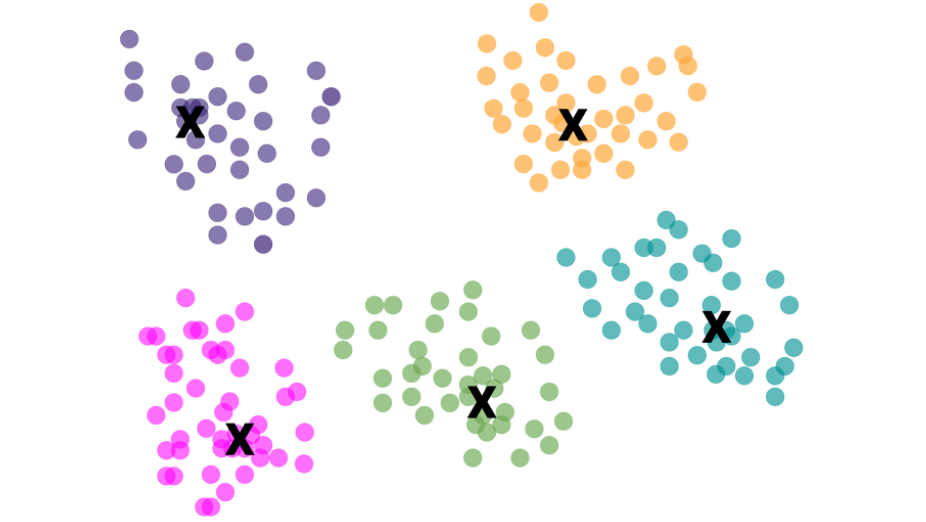

The centroid is found by taking the mean of all the x values in a cluster, and the mean of all the y values in a cluster.

For each cluster, add the values of all members. For example, if a cluster of data consisted of the points (80, 56), (75, 53), (60, 50), and (68,54), the sum of the values would be (283, 213).

Divide the total by the number of members of the cluster. In the example above, 283 divided by four is 70.75, and 213 divided by four is 53.25, so the centroid of the cluster is (70.75, 53.25).

The following examples use the cleaned iris data from the previous section.

Code along to see how we can use K-means on the iris dataset. To get started, we’ll import our libraries as well as the library for the KMeans algorithm from the sklearn library, as shown below: